# Model Development

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('processed_data.csv')
df_original = pd.read_csv('new_features_data.csv')

In [3]:
df.head()

,Gender,Loyalty Member,Favorite Product Type_Laptop,Favorite Product Type_Smartphone,Favorite Product Type_Smartwatch,Favorite Product Type_Tablet,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,...,Age,Recency,Frequency,Monetary,Churn,Product Diversity,Total Orders,Cancellation Rate,Average Rating,Add-on Frequency
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.213943,0.290005,0.410680,0.236632,0.952983,0.832837,0.410680,0.416733,-0.572888,0.655990
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.448280,-0.915062,0.410680,-0.050176,-1.049337,0.832837,0.410680,-0.811092,-0.572888,-0.691107
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.428018,-0.046545,-0.755989,-1.184609,0.952983,-0.695795,-0.755989,-0.811092,1.804859,0.655990
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.448280,-0.100827,-0.755989,-1.175153,0.952983,-0.695795,-0.755989,-0.811092,1.804859,0.655990
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.331244,-0.415665,0.410680,1.489675,-1.049337,0.832837,0.410680,-0.811092,-0.097339,-0.691107


In [4]:
df = df.drop(['Customer ID'], axis=1)

In [5]:
df.shape

(12136, 25)

In [22]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12136 entries, 0 to 12135
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               12136 non-null  int64  
 1   Age                       12136 non-null  int64  
 2   Gender                    12136 non-null  object 
 3   Loyalty Member            12136 non-null  object 
 4   Recency                   12136 non-null  int64  
 5   Frequency                 12136 non-null  int64  
 6   Monetary                  12136 non-null  float64
 7   Churn                     12136 non-null  int64  
 8   Favorite Product Type     12136 non-null  object 
 9   Product Diversity         12136 non-null  int64  
 10  Total Orders              12136 non-null  int64  
 11  Cancellation Rate         12136 non-null  float64
 12  Average Rating            12136 non-null  float64
 13  Add-on Frequency          12136 non-null  float64
 14  Prefer

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12136 entries, 0 to 12135
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Gender                                12136 non-null  float64
 1   Loyalty Member                        12136 non-null  float64
 2   Favorite Product Type_Laptop          12136 non-null  float64
 3   Favorite Product Type_Smartphone      12136 non-null  float64
 4   Favorite Product Type_Smartwatch      12136 non-null  float64
 5   Favorite Product Type_Tablet          12136 non-null  float64
 6   Preferred Payment Method_Cash         12136 non-null  float64
 7   Preferred Payment Method_Credit Card  12136 non-null  float64
 8   Preferred Payment Method_Debit Card   12136 non-null  float64
 9   Preferred Payment Method_PayPal       12136 non-null  float64
 10  Preferred Payment Method_Paypal       12136 non-null  float64
 11  Preferred Shipp

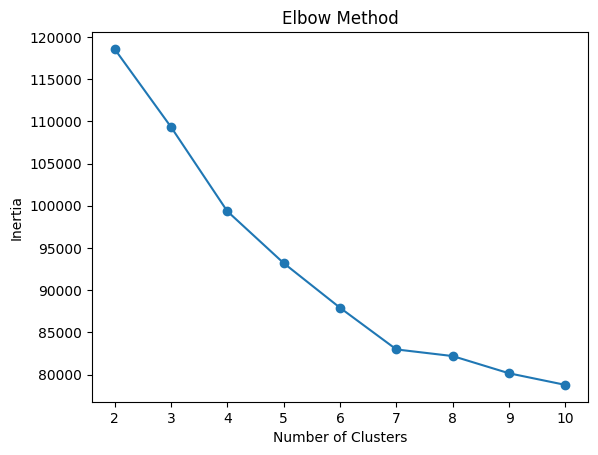

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df)
df['Cluster'] = clusters
df_original['Cluster'] = clusters

sil_score = silhouette_score(df, clusters)
print(f"Silhouette Score for K-Means: {sil_score}")

Silhouette Score for K-Means: 0.24607354841815823


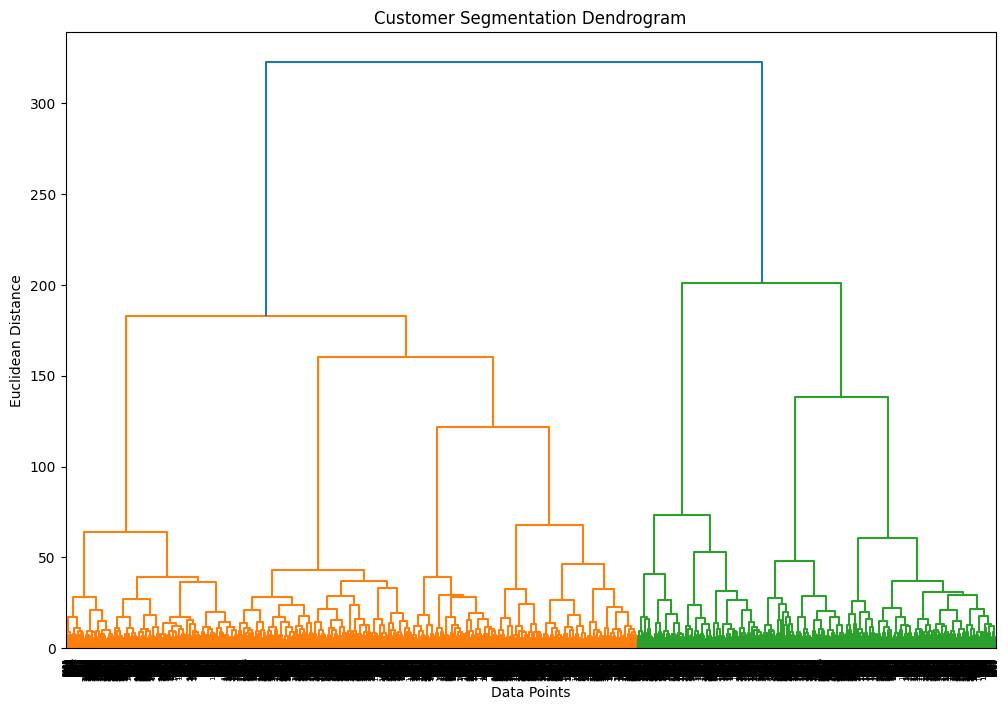

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linkage_matrix = linkage(df, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Customer Segmentation Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

optimal_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
clusters = agg_clustering.fit_predict(df)

df['Hierarchical_Cluster'] = clusters
df_original['Hierarchical_Cluster'] = clusters

In [11]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(df, clusters)
print(f"Silhouette Score for Hierarchical Clustering: {sil_score}")

Silhouette Score for Hierarchical Clustering: 0.26880777179880255


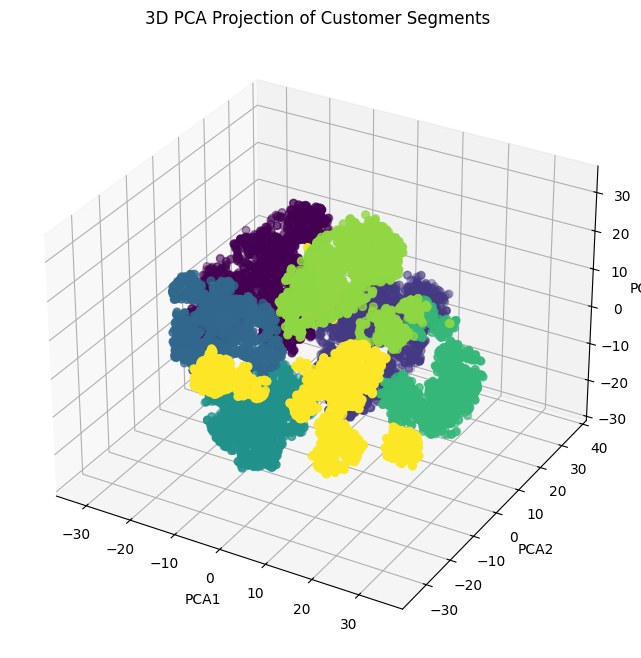

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
df['PCA3'] = pca_result[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df_original['Cluster'], cmap='viridis', s=30)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D PCA Projection of Customer Segments')
plt.show()

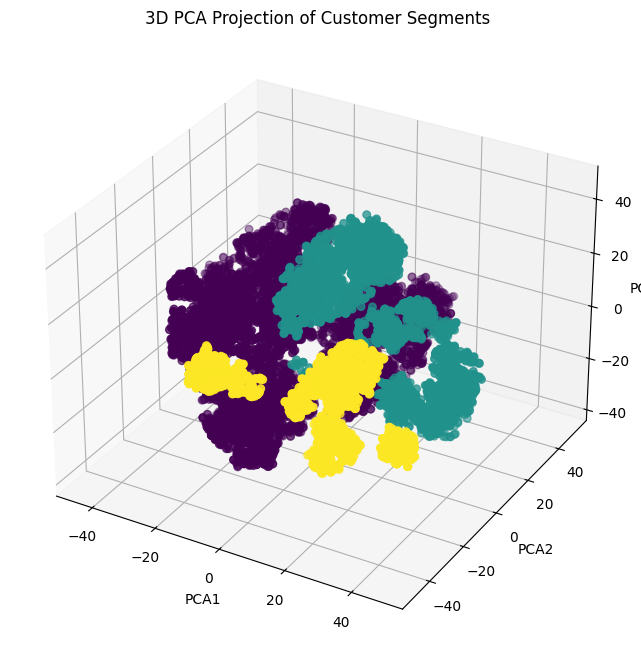

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)

df['PCA1_H'] = pca_result[:, 0]
df['PCA2_H'] = pca_result[:, 1]
df['PCA3_H'] = pca_result[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['PCA1_H'], df['PCA2_H'], df['PCA3_H'], c=df_original['Hierarchical_Cluster'], cmap='viridis', s=30)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D PCA Projection of Customer Segments')
plt.show()

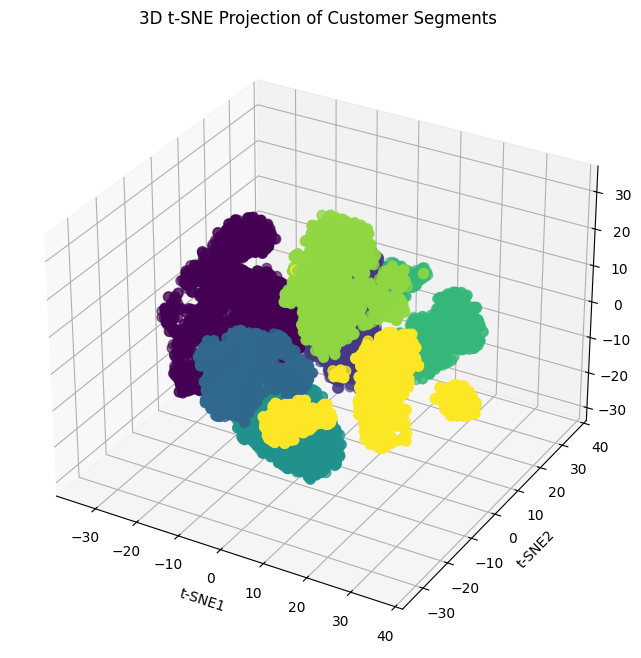

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
tsne_result = tsne.fit_transform(df)

df['TSNE1'] = tsne_result[:, 0]
df['TSNE2'] = tsne_result[:, 1]
df['TSNE3'] = tsne_result[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['TSNE1'], df['TSNE2'], df['TSNE3'], c=df_original['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('t-SNE1')
ax.set_ylabel('t-SNE2')
ax.set_zlabel('t-SNE3')
ax.set_title('3D t-SNE Projection of Customer Segments')
plt.show()

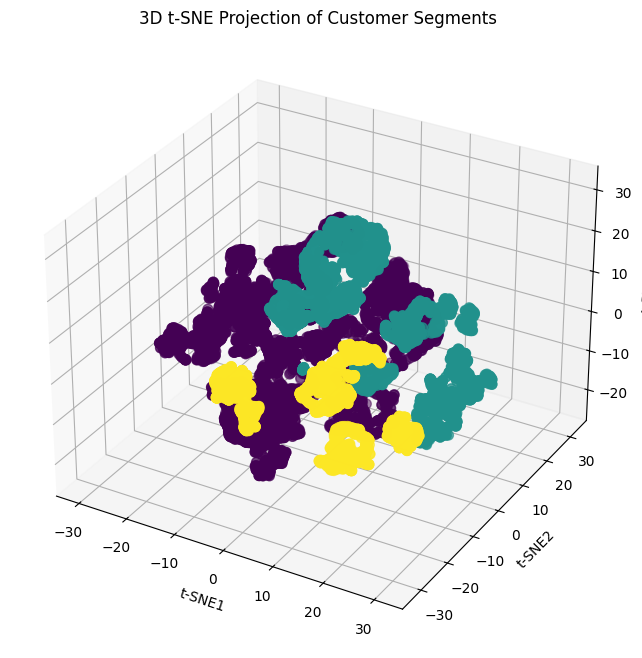

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
tsne_result = tsne.fit_transform(df)

df['TSNE1_H'] = tsne_result[:, 0]
df['TSNE2_H'] = tsne_result[:, 1]
df['TSNE3_H'] = tsne_result[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['TSNE1_H'], df['TSNE2_H'], df['TSNE3_H'], c=df_original['Hierarchical_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('t-SNE1')
ax.set_ylabel('t-SNE2')
ax.set_zlabel('t-SNE3')
ax.set_title('3D t-SNE Projection of Customer Segments')
plt.show()

In [23]:
cluster_characteristics = df_original.groupby('Cluster').agg({
    'Gender': lambda x: x.mode()[0],
    'Loyalty Member': lambda x: x.mode()[0],
    'Favorite Product Type': lambda x: x.mode()[0],
    'Preferred Payment Method': lambda x: x.mode()[0],
    'Preferred Shipping Type': lambda x: x.mode()[0],
    'Age': 'mean',   
    'Recency': 'mean',       
    'Monetary': 'mean',
    'Frequency': 'mean',        
    'Product Diversity': 'mean',
    'Total Orders': 'mean',  
    'Add-on Frequency': 'mean',
    'Cancellation Rate': 'mean',
    'Average Rating': 'mean',
}).reset_index()

In [24]:
cluster_characteristics.head(7)

,Cluster,Gender,Loyalty Member,Favorite Product Type,Preferred Payment Method,Preferred Shipping Type,Age,Recency,Monetary,Frequency,Product Diversity,Total Orders,Add-on Frequency,Cancellation Rate,Average Rating
0,0,Female,No,Smartphone,Credit Card,Standard,49.140576,287.449224,3026.749987,1.021729,1.000000,1.021729,0.998891,0.000000,3.119290
1,1,Female,No,Smartphone,Credit Card,Expedited,48.992958,122.396567,6717.560092,2.129842,1.806338,2.129842,0.755538,32.570423,3.093163
2,2,Male,No,Smartphone,Credit Card,Standard,48.851254,288.204301,3157.553952,1.038530,1.002688,1.038530,0.995968,99.686380,3.129928
3,3,Male,No,Smartphone,Credit Card,Standard,49.188048,126.174342,3241.663536,1.046053,1.000000,1.046053,1.000000,33.607456,3.117599
4,4,Male,No,Laptop,Credit Card,Standard,48.690806,130.147274,12620.717022,3.463792,2.729862,3.463792,0.754685,32.158356,3.002477
5,5,Male,No,Smartphone,Credit Card,Express,48.866106,248.503081,6383.266527,2.151821,1.875070,2.151821,0.755742,32.450980,3.100747
6,6,Male,No,Smartphone,Credit Card,Standard,49.988520,225.600604,3125.942085,1.022356,1.000604,1.022356,0.000000,34.350453,3.132326


In [28]:
hierarchical_cluster_characteristics = df_original.groupby('Hierarchical_Cluster').agg({
    'Gender': lambda x: x.mode()[0],
    'Loyalty Member': lambda x: x.mode()[0],
    'Favorite Product Type': lambda x: x.mode()[0],
    'Preferred Payment Method': lambda x: x.mode()[0],
    'Preferred Shipping Type': lambda x: x.mode()[0],
    'Age': 'mean',   
    'Recency': 'mean',       
    'Monetary': 'mean',
    'Frequency': 'mean',        
    'Product Diversity': 'mean',
    'Total Orders': 'mean',  
    'Add-on Frequency': 'mean',
    'Cancellation Rate': 'mean',
    'Average Rating': 'mean',
}).reset_index()

In [29]:
hierarchical_cluster_characteristics.head()

,Hierarchical_Cluster,Gender,Loyalty Member,Favorite Product Type,Preferred Payment Method,Preferred Shipping Type,Age,Recency,Monetary,Frequency,Product Diversity,Total Orders,Add-on Frequency,Cancellation Rate,Average Rating
0,0,Male,No,Smartphone,Credit Card,Standard,49.064015,197.945761,4221.808256,1.367350,1.245748,1.367350,0.924680,33.018615,3.112517
1,1,Male,No,Laptop,Credit Card,Express,48.833003,200.623432,8901.428370,2.683168,2.217492,2.683168,0.751323,32.375452,3.060191
2,2,Male,No,Smartphone,Credit Card,Standard,49.929225,225.142770,3115.984234,1.012813,1.000000,1.012813,0.000000,34.289201,3.133923
